# Прикладная статистика. ДЗ 1.
# Академия Аналитиков Авито

__Правила:__
- Финальный дедлайн: **2022-11-30 23:59**. 
- После того как ваше решение проверят и ответят, вам дается неделя на исправление тех задач, о которых скажет проверяющий. Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW1-<ваше имя> через бота @AAA_stats23_bot
    - или в личные сообщения боту.
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

In [56]:
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np

# Общие замечания по задачам с автопроверкой

Во всех задачах далее, где потребуется автопроверка, можно использовать только следующие библиотеки:

```
from collections import namedtuple
from scipy.stats import binom
import math
import numpy as np
```

Еще раз обращаем внимание, что в ячейках автопроверки __не__ должны быть импортированы какие-либо библиотеки. В других ячейках импортировать библиотеки можно, но при проверке использованы будут только указанные.

## Задача 1. 3 балла

[Осьминог Пауль](https://www.championat.com/football/article-3238881-samye-izvestnye-zhivotnye-predskazateli.html) 14 раз пробовал угадать победителя футбольного матча.
12 раз он угадал правильно, 2 раза — ошибся. Мы хотим проверить гипотезу:

 - $H_0$: осьминог угадывает победителя матча с вероятностью 0.5
 - $H_1$: осьминог выбирает победителя  матча с вероятностью $\neq$ 0.5

#### Пункт А. 1 балл: 

### На зачет

Вам нужно разработать статистический критерий для проверки этой гипотезы, а также посчитать p-value.

#### теор. выкладки
Вообще говоря, можно предложить любой критерий, хоть критерий Сноу - так как в задании нет никаких требований к тому, насколько критерий должен быть "хорошим".  
Однако я все же воспользуюсь критерием из лекций на основе биномиального распределения.  
К тому же постановка задачи выше подразумевает, что критерий должет быть двухсторонним. Я считаю это разумным, так как у меня нет никакой априорной информации, что Пауль угадывает "лучше", а не "хуже" монетки. К тому же я не верю в экстрасенсов, особенно животных, особенно осьминогов, при всем уважении к осьминогам. В данном примере  (когда верных угадываний больше половины) двухсторонний критерий на уровне значимости $\alpha $ выдаст такой же вердикт как и односторонний на уровне значимости $\alpha/2$, то есть двухсторонний критерий будет "занижать" исключительность Пауля. 




Чтобы решить эту задачу, надо переформулировать ее на языке математики:
- Пусть $p$ &mdash; истинный параметр конверсии. Тогда наша гипотеза звучит так: 
    - $H_0: p = p_0 = 0.5\ vs.\ H_1: p \ne 0.5$
    - Нас устраивает ошибка первого рода в $\alpha$.
- Какой критерий использовать?
    - Рассмотрим статистику  $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i,\ T \overset{H_0}{\sim} \text{Binom} (n, p_0)$ с функцией распределения $F(\cdot)$, где  $X_i$ &mdash; бернулевская случайная величина, равная 1, если Пауль угадал и 0 в противном случае. 
    - Когда мы отвергнем поставленную гипотезу?  
        Если $T(X^n) \geq U \vee T(X^n) \leq L$, то мы отвергнем гипотезу для чисел $L$ и $U$, которые определим ниже. Рассмотрим симметричный критерий, то есть такой, что мы подбираем числа $L$ и $U$ таким образом, что $P_{H_0}(T(X^n) \geq U ) \leq \alpha/2$ или $P_{H_0}(T(X^n) \leq L ) \leq \alpha/2$. Ниже я покажу, что при $L = F^{-1}(\alpha/2) - 1$ и $U = F^{-1}(1 - \alpha/2) + 1$ критерий имеет ошибку первого рода, не превосходящую  $\alpha$, то есть $P_{H_0}(T(X^n) \geq U \vee T(X^n) \leq L) \leq \alpha$.
        
- Почему ошибка первого рода такого критерия не больше альфа?

     - По определению квантиль распределения $F^{-1}(p) = \{\min\ x: F(x) \geq p \}$, то есть $ P_{H_0}(T(X^n) \leq L) =  P_{H_0}(T(X^n) \leq F^{-1}(\alpha/2) ) \geq \alpha/2$, но $P_{H_0}(T(X^n) \leq L-1)  < \alpha/2$. (Вообще говоря, нам нужнно нестрогое неравенство и нас устроил бы случай, если бы $P_{H_0}(T(X^n) \leq F^{-1}(\alpha/2) ) = \alpha/2$ и мы могли бы в качестве $L$ взять квантиль без вычитания единицы. Однако, кажется, что тогда придется еще и разбираться с ошибками округления, а в реальных задачах малые выборки маловероятны, да и нет ничего страшного если мы возьмем альфа строго меньше альфа максимального.
     
     - Оценка для второй части
     $$
                \begin{align}
                    &P_{H_0}(T(X^n) \geq U) = \\
                    &P_{H_0}(T(X^n) \geq F^{-1}(1 - \alpha/2) + 1) = \\
                    &P_{H_0}(T(X^n) > F^{-1}(1 - \alpha/2) ) = \\
                    & 1 - P_{H_0}(T(X^n) \leq F^{-1}(1 - \alpha/2)) = \\ 
                    & 1 - F(F^{-1}(1 - \alpha/2)) \leq \\
                    & \{\text{из определения } F(F^{-1}(1 - \alpha/2)) \geq 1 - \alpha/2\} \\
                    & 1 - (1 - \alpha/2) = \\ 
                    & \alpha/2
                \end{align}
                $$

          То есть $P_{H_0}(T(X^n) \geq U) \leq \alpha/2$
        
     - Таким образом $P_{H_0}(T(X^n) \leq L) \vee P_{H_0}(T(X^n) \leq U ) = P_{H_0}(T(X^n) \leq L) + P_{H_0}(T(X^n) \leq U ) < \alpha/2 + \alpha/2 = \alpha$
- Итого, решающее правило в общем виде:
    - $L = F^{-1}(\alpha/2) - 1$ и $U = F^{-1}(1 - \alpha/2) + 1$
    - Если $T(X^n) \leq L  \vee T(X^n) \geq U$ - отвергнуть нулевую гипотезу
    - В противном случае, то есть если $T(X^n) \in (L, U)$ - не отклонять нулевую гипотезу
    
    
    


Теперь можно посчитать значение $p_{value}$. Пусть наблюдаемое значение статистики $T(X^n) = t \geq n/2$. (Неравенство верно в нашем случае, не пишу в общем случае, чтобы не мучиться с модулями).  
Из определения $p_{value}$
<!-- $$
    \begin{align}
        &p_{value} = P_{H_0}(T(X^n)\geq t \vee T(X^n) \leq n - t) =  \\
        &P_{H_0}(T(X^n)\geq t) +  (T(X^n) \leq n - t) = \\
        &P_{H_0}(T(X^n) > t - 1) +  (T(X^n) \leq n - t ) = \\
        &1 - F(t-1) + F(n-t) 
    \end{align}
    $$
     -->
    
$$
    \begin{align}
        &p_{value} = 2\cdot \min(P_{H_0}(T(X^n)\geq t), P_{H_0}(T(X^n)\leq t)) = \\
        &2\cdot \min(P_{H_0}(T(X^n) > t - 1), P_{H_0}(T(X^n)\leq t)) = \\
        &2\cdot \min( 1 - F(t-1), F(t)) 
    \end{align}
    $$


In [57]:
p = 0.5
n = 14
t = 12

print("p_value =",2*(1 - binom(n = n, p = p).cdf(t-1)))

p_value = 0.012939453125


А если бы мы рассматривали односторонную правостороннюю гипотезу 
$p_{value} = P_{H_0}(T(X^n)\geq t  = 1 - F(t-1) $?


In [58]:
p = 0.5
n = 14
t = 12
print("p_value =", 1 - binom(n = n, p = p).cdf(t-1))

p_value = 0.0064697265625


На уровне значимости $\alpha = 0.01$ мы бы отвергли одностороннюю нулевую гипотезу, но не отвергаем двухстороннюю нулевую гипотезу.

Реализуйте критерий `check_paul_criterion(n, k, alpha)`, где 
- `n` &mdash; количество матчей;
- `k` &mdash; количество верных предсказаний от осьминога;
- `alpha` &mdash; уровень значимости критерия.

Функция должна вернуть `PaulCheckResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue


In [59]:
# Автопроверка

PaulCheckResults = namedtuple('PaulCheckResults', ['is_rejected', 'pvalue'])

def check_paul_criterion(n: int, k: int, alpha: float = 0.05):
    """
    Параметры:
    - n: количество матчей
    - k: количество верных предсказаний от осьминога
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - PaulCheckResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 
                       на уровне значимости alpha
        - pvalue: float
    """

    is_rejected = None
    pvalue = None

    zero_distribution = binom(p = 0.5, n = n)
    
    L = zero_distribution.ppf(alpha/2) - 1
    U = zero_distribution.ppf(1 - alpha/2) + 1
    is_rejected = (k <= L or k>= U)
    pvalue = 2*min(1 - zero_distribution.cdf(k-1), zero_distribution.cdf(k))
    pvalue = min(1, pvalue )

    return PaulCheckResults(is_rejected, pvalue)


In [60]:
check_paul_criterion(n = 14, k = 12, alpha = 0.05)

PaulCheckResults(is_rejected=True, pvalue=0.012939453125)

#### Пункт B. 2 балла: 

Какие выводы можно сделать из полученного результата?

При двухсторонней гипотезе $p_{value} = 1.3\%$, то есть осьминог Пауль относится к $1.3\%$ самых "удачливых" осьминогов, которые конечно же выбирают наугад. Если бы мы взяли 1000 осьминогов, то 13 (или около того) из них показалали бы такой же или более экстремальный результат, что и осьминог Пауль. 

Следует ли отсюда, что осьминог Пауль - экстрасенс? Нет

## Задача 2. 3 балла

### На зачет

Мы разработали новый дизайн нашего продукта. Вероятность, что он понравится случайному человеку — $p$, и она нам неизвестна. Мы хотим
проверить $H_0: p = 1$ с помощью статистического критерия c уровнем значимости $\alpha$. Предложить критерий для решения этой задачи.

При справедливости нулевой гипотезы, вероятность нахождения человека, которому не нравится дизайн продукта - 0. То есть нулевое распределие для одного человека - это бернулевская случайная величина $X_i$ с $p = 1$ (принимает значение 1, если человеку нравится дизайн и 0 в противном случае), а для выборки из $n$ людей - статистика $T(X^n) = \sum X_i$ имеет распределение $Binom (n, p = 1)$ (дает кол-во людей, которым нравится дизайн).

Критерий, который сразу приходит в голову:
   - Если статистика $T(X^n) < n$, отвергнуть гипотезу $H_0$.
   - Если статистика $T(X^n) = n$, то  не отвергать гипотезу $H_0$.
   
Однако видно, что вероятность ошибки первого рода в точности равняется нулю, так как при истинности нулевой гипотезы, у нас вероятность "выпадения нуля" и следовательно вероятность наблюдения $k < n$ равна нулю.

Если же нам необходим критерий с ошибкой первого рода, равной заданному $\alpha$, то предлагаю такой:
   - Если статистика $T(X^n) < n$, отвергнуть гипотезу $H_0$.
   - Если статистика $T(X^n) = n$, то с вероятностью $1-\alpha$ не отвергать гипотезу $H_0$, с вероятностью $\alpha$ отвергнуть гипотезу $H_0$.
   
Очевидно, вероятность ошибки первого рода такого критерия равна $\alpha$ в точности.

Какой критерий лучше?  
   - Первый критерий:  
       \- Первые критерий имеют нулевую ошибку первого рода и соответсвенно меньшую мощность, чем второй.  
       \- Критерий более консервативный, чем просит бизнес, то есть не совсем соответсвует поставленной задаче.  
       \+ Критерий интуитивно понятен. 
       
   - Второй критерий:  
       \+ Имеет большую мощность, чем первый. 
       \+ В точности соответсвует требованиям к ошибьке первого рода  
       \- Не понятен бизнесу. "Как так, у нас нет ни одного недовольного человека, а вы говорите, что он нравится не всем??"
       
Я отнесусь к задаче более формально и реализиую второй критерий. Впрочем, не обещаю, что столкнувшись с реальной бизнесовой задачей, я поступил бы так же.

Напишите функцию `calculate_number_of_users(alpha, beta, p)` — скольки людям нужно показать этот дизайн, чтобы добиться мощности `1 - beta` при заданном `p` и уровне значимости `alpha`.

P.S. Утверждается, что на наших тестах ответ не будет превосходить 1000 человек.

In [61]:
#Автопроверка

def calculate_number_of_users(alpha: float, beta: float, p: float):
    """
    Параметры:
    - alpha: уровень значимости
    - beta: инвертированная мощность критерия. мощность = 1 - beta.
    - p: истинная вероятность того, что пользователю понравится дизайн.
    Возвращает:
    - number_of_users: int
        - количество людей, которым надо показать дизайн.
    """
    number_of_users = None
    
    def get_power(p, n, alpha):
        return 1 - binom(p = p, n = n).pmf(n)*(1-alpha)

    left_bound = 1
    right_bound = 1000
    
    
    #ограничение сверху на число человек, намекает на бисекцию
    while left_bound + 1 < right_bound:
        n = abs(left_bound + right_bound)//2
        if get_power(p, n, alpha) == 1 - beta:
            right_bound = n
            break
        
        elif get_power(p, n, alpha) > 1 - beta:
            right_bound = n
            left_bound = left_bound
        else:
            right_bound = right_bound
            left_bound = n
        
    number_of_users = right_bound   
        

    

    return number_of_users

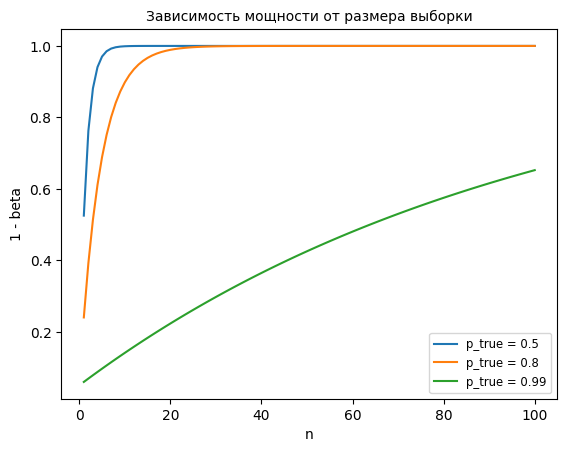

In [62]:
# Построим график как зависит мощность от числа человек n для фиксированного alpha и разных p
import matplotlib.pyplot as plt

def get_power(p, n, alpha):
        return 1 - binom(p = p, n = n).pmf(n)*(1-alpha)


n_array = np.array([i for i in range(1, 1000+1)])
power_array1 = np.array([get_power(0.5, n, 0.05) for n in n_array])
power_array2 = np.array([get_power(0.8, n, 0.05) for n in n_array])
power_array3 = np.array([get_power(0.99, n, 0.05) for n in n_array])



plt.plot(n_array[:100], power_array1[:100], label='p_true = 0.5')
plt.plot(n_array[:100], power_array2[:100], label='p_true = 0.8')
plt.plot(n_array[:100], power_array3[:100], label='p_true = 0.99')

legend = plt.legend( fontsize='small')

plt.xlabel('n')
plt.ylabel('1 - beta')

plt.title('Зависимость мощности от размера выборки', fontsize=10)
plt.show()



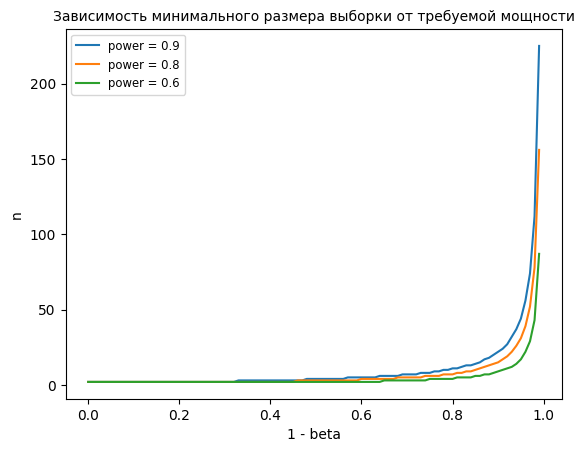

In [63]:
# Построим график как необходимое число людей в зависимости от истинной p 
# при фиксированной alpha для разных требований к мощности 

p_array = np.array([i/100 for i in range(0, 100)])
n_array1 = np.array([calculate_number_of_users(0.05, 0.1, p) for p in p_array])
n_array2 = np.array([calculate_number_of_users(0.05, 0.2, p) for p in p_array])
n_array3 =np.array([calculate_number_of_users(0.05, 0.4, p) for p in p_array])

plt.plot(p_array, n_array1, label = 'power = 0.9')
plt.plot(p_array, n_array2, label = 'power = 0.8')
plt.plot(p_array, n_array3, label = 'power = 0.6')


legend = plt.legend( fontsize='small')

plt.xlabel('1 - beta')
plt.ylabel('n')


plt.title('Зависимость минимального размера выборки от требуемой мощности', fontsize=10)
plt.show()




## Задача 3.

По недостоверной информации (вероятность, что она верна, считаем за 1%), в новой версии нашего сайта есть сложнодетектируемый баг. Мы могли бы попросить разработку его отыскать и починить, но на это уйдет много ресурсов.

К счастью, у нас есть старый AB тест (новая версия сайта vs старая), который мы можем проанализировать и с некоторой вероятностью обнаружить наличие бага просто сравнением выборок. У нас есть три критерия для проверки гипотезы "$H_0$: баги нет, $H_1$: баг есть":
- критерий `A`: $\alpha = 0.02, 1-\beta = 0.50$
- критерий `B`: $\alpha = 0.05, 1-\beta = 0.60$
- критерий `C`: $\alpha = 0.10, 1-\beta = 0.70$

Если критерий находит баг, мы просим разработчиков потратить силы и починить. На это у них уйдет усилий на 1 М ₽ независимо от того, найдут они баг или нет.
Если критерий не найдет баг, затраты разработчиков будут нулевыми, но из-за бага мы потеряем в конечном итоге 50 М ₽.

#### Пункт А. 2 балла: 

Какой критерий стоит выбрать?

Введем некоторые обозначения:
   - Пусть $X$ случайная величина, показывающая наши потери
   - H_0: бага нет
   - H_1: бага есть
   - R: случайная величина, равная нулю, если тест не обнаружил баг, и 1 в противном случае
   
   
Согласно условию
   - $P(R = 1|H_0) = \alpha, P(R = 0|H_1) = \beta$
   - $P(X) = P(X|R=1)\cdot P(R=1) +  P(X|R=0)\cdot P(R=0)$

Определим 4 события:
   - $C_{00} = (R=0)\cap H_0$
   - $C_{01} = (R=0)\cap H_1$
   - $C_{10} = (R=1)\cap H_0$
   - $C_{11} = (R=1)\cap H_1$
   
Найдем их вероятности, подставив априорные вероятнсти $P(H_1) = 0.01, \ P(H_0) = 0.99$
   - $P(C_{00}) = P((R=0)\cap H_0) = P(R=0|H_0)P(H_0) = (1 - P(R=1|H_0))P(H_0) = (1- \alpha)P(H_0) = 0.99(1- \alpha)$
   - $P(C_{01}) = P((R=0)\cap H_1) = P(R=0|H_1)P(H_1) = \beta P(H_1) = 0.01\beta$
   - $P(C_{10}) = P((R=1)\cap H_0) = P(R=1|H_0)P(H_0) = \alpha P(H_0) = 0.99 \alpha$
   - $P(C_{11}) = P((R=1)\cap H_1) = P(R=1|H_1)P(H_1) = (1 - \beta)P(H_1) = 0.01(1 - \beta)$
   
Эти события образуют полное покрытие вероятносного пространства. А значит справедлива формула полной вероятности:

$P(X = k) = \sum P(X = k|C_{ij})P(C_{ij})$, где суммирование идет по этим четырем событиям

Аналогично справедлива формула для матожидания:


$EX = \sum E(X|C_{ij})P(C_{ij})$


Для фиксированнаго события $C_{ij}$ случаяная величина $X$ - "несулчайная" случаяная величина. Вычислим ее значения, обозначив потери от ненайденного бага за $r$ (чтобы использовать во втором пункте). (Все цифры здесь и далее - в миллионах)

   - $E(X|C_{00}) = X_{00} = X|(R=0\cap H_0) = 0$
   - $E(X|C_{01}) = X_{01} =  X|(R=0\cap H_1) = r$
   - $E(X|C_{10}) = X_{10} =  X|(R=1\cap H_0) = 1$
   - $E(X|C_{11}) = X_{11} =  X|(R=1\cap H_1) = 1$
   
   
Теперь мы готовы записать матожидание наших потерь в зависимости от характеристик критерия: $\alpha \text{ и } \beta$

$$
    \begin{align}
        &EX = X_{00}P(C_{00}) + X_{01}P(C_{01}) + X_{10}P(C_{10}) + X_{11}P(C_{11})  = \\
        &0\cdot 0.99(1- \alpha) + r\cdot 0.01\beta + 1\cdot 0.99 \alpha + 1\cdot 0.01(1 - \beta) = \\
        &r\cdot 0.01\beta +  0.99 \alpha +  0.01(1 - \beta)
    \end{align}
    $$
    
Теперь мы готовы посчитать для каждого критерия ожидаемые потери и выбрать лучший, то есть тот у которого потери минимальны

In [64]:
def expected_loss_function(a, b, r = 50):
    return r*0.01*b +  0.99*a +  0.01*(1 - b)

In [65]:
for name, a, b in (('A', 0.02, 0.5 ), ('B', 0.05, 0.4), ('C', 0.1, 0.3)):
    print(f'Ожидание потерь при использовании критерия {name} -- {expected_loss_function(a, b)}')

Ожидание потерь при использовании критерия A -- 0.2748
Ожидание потерь при использовании критерия B -- 0.2555
Ожидание потерь при использовании критерия C -- 0.256


**Вывод:** лучший критерий - критерий B

#### Пункт B. 2 балла: 
Предложите оптимальную стратегию, если потери от ненайденного бага составят вместо 50М:
- 20М рублей;
- 3М рублей;
- 300М рублей.

In [70]:
for r in (20, 3, 300):
    print(f'Потери от ненайденного бага = {r}M')
    d = {}
    for name, a, b in (('A', 0.02, 0.5 ), ('B', 0.05, 0.4), ('C', 0.1, 0.3)):
        x = expected_loss_function(a, b, r)
        d[name] = x
        print(f'\tОжидание потерь при использовании критерия {name} -- {x:0.3f}M')
    min_exp_loss = min(d.values())
    
    print(f'Лучший дизайн теста - {", ".join([name for name, value in d.items() if value == min_exp_loss])}')
    print('\n')

Потери от ненайденного бага = 20M
	Ожидание потерь при использовании критерия A -- 0.125M
	Ожидание потерь при использовании критерия B -- 0.136M
	Ожидание потерь при использовании критерия C -- 0.166M
Лучший дизайн теста - A


Потери от ненайденного бага = 3M
	Ожидание потерь при использовании критерия A -- 0.040M
	Ожидание потерь при использовании критерия B -- 0.068M
	Ожидание потерь при использовании критерия C -- 0.115M
Лучший дизайн теста - A


Потери от ненайденного бага = 300M
	Ожидание потерь при использовании критерия A -- 1.525M
	Ожидание потерь при использовании критерия B -- 1.256M
	Ожидание потерь при использовании критерия C -- 1.006M
Лучший дизайн теста - C


